# ECE 3 : Homework 2

## Instructions

To get started, you should go through the following steps.
- Rename this jupyter notebook by adding your name: e.g. `ECE3_HW2_<your-name>.ipynb`.
- Complete all the exercises by directly editing your notebook.
- Make sure that the coding portions run without errors.
- You can also upload this file to Google Colab and edit it there instead of using Jupyter Notebook locally. Doing this helped resolve some issues with importing libraries in HW1.

## Problem 1 - Regression using the k-NN algorithm



For this exercise we will use the "Diabetes" dataset from the scikit-learn package.

The following chunk of code loads the dataset and prints a full description of it. Run it and carefully go through the description.


In [1]:
import numpy as np
from sklearn.datasets import load_diabetes

dataset = load_diabetes()
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

We see that the dataset consists of 10 attributes, including demographic information (such as age and sex) and various health measurements (such as BMI and blood pressure) for 442 diabetes patients. It also includes a response variable for each one of the patients, which is a measure of the progression of their disease. 

The attributes (a.k.a. the features or the data or the samples or the inputs) and the response variable (a.k.a. the target or the output) are given to us in the form of NumPy arrays. Let's assign them to variables X and y respectively and inspect their shape. Try to think of what their shape should be before running the following block of code.

In [2]:
X, y = dataset.data, dataset.target

print("The attributes are inlcuded in a matrix of shape:", X.shape)
print("The response variables are included in a vector of length:", y.shape)

The attributes are inlcuded in a matrix of shape: (442, 10)
The response variables are included in a vector of length: (442,)


We see that both the data matrix and the target vector have 442 rows, that is because we have 442 patients, with one row of data corresponding to each one of them. The data matrix has 10 columns, because for each patient we collect 10 demographic and health measurements. The target array is just a vector (i.e. it has only 1 column) as for each patient we only have one response measurement.

Now lets take a closer look at the target vector:

In [3]:
print("The data type of the target is:", y.dtype)
print("Target values range from", np.min(y), "to", np.max(y))

The data type of the target is: float64
Target values range from 25.0 to 346.0


We see that the target here is a floating point number which can take a broad range of values. The exact value of the target is different for every patient. It is obvious that there is a connection between the health measurements and the demographic group of a person and the progression of that persons disease. More formally we can think that there is some function $f$ that maps the attributes to the target:

$$\text{disease progression} = f(age, sex, ..., s_6)$$

However, we don't know what this function $f$ looks like! It could be that:

$$f(age, sex, ..., s6) = \text{age}^2 - 2*\text{bmi}^3 + ... + \frac{1}{s_6}$$

or that:

$$f(age, sex, ..., s6) = \text{age} + 2*log(\text{bmi}) + ... - {s_5}$$

or really anything else! 

If we knew what the function was then we could help doctors give better advise to their patients (e.g. to lower their bmi or eat some food that's going to increase their $s_3$ measurement). 

Our goal in this exercise is to use the data that are available to us and try to deduce what is the relationship between the attributes and the target. Equivalently, you can also say that our goal is to estimate what the response variable would be for any set of values the attributes can take. This task is called **regression**!

If our target was not a continuous variable but a discrete one, then our goal would be to use the data to decide to which one of a number of classes a sample belongs. This task is called **classification** and it is discussed more in depth on Lab 4, where we see that we can use similar algorithms for it.

### Training and Test Sets

To perform regression we will follow the following strategy. We will split our data in two groups, the training set and the test set. We will use the training set to deduce an approximation $f^\prime$ of the real function $f$ and we will use the test set to check how close is our estimate of the response value when we use $f'$ to the observed response value. Typically, we assign most of our data to the training set and keep only about $20-30\%$ of them for the test set.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### The k-NN algorithm for regression

A simple regression algorithm is the k Nearest Neighbors algorithm. In k-NN regression the response of a datapoint is estimated as the average of the values of its k nearest neighbors.

*   "Nearest" is defined with respect to some distance metric, usually that is the euclidean distance, however other distances are more appropriate for some applications
*   k is a parameter chosen by the engineer, it is taken to be odd to avoid a situation where we can't decide because of a tie

In this exercise you will implement the k-NN rule, using the euclidean distance, to estimate a response for each datapoint in the test set. Then you will compare that to the observed response to evaluate the performance of the algorithm.

#### (a) Write a function that calculates the euclidean distance between two points:

In [5]:
# Replace "..." with your code

def eucl_dist(a, b):

    return np.sum((np.subtract(a,b)) ** 2) ** (1/2)

#### (b) Write a function that receives as arguments a point and the training set, and calculates the distance of that point from all the points of the training set. The function should return a vector of length equal to the number of points in the training set. You can opt to you use the previous function that you wrote or not.

In [6]:
# Replace "..." with your code

def dist_from_training_set(a, X):
  array = np.empty(len(X),)
  index_count = 0
  for i in X:
    distance = eucl_dist(i,a)
    array[index_count]=distance
    index_count = index_count + 1
  return array

#  return np.sum((X-a)**2,axis=1)**(1/2)

# Alternatively you can write you own version this function, using a loop to
# iteratively call the function from part (a) for each point in the training set

#### (c) Write a function that receives as arguments a point, the training data, the training labels and an odd positive number k and implements that k-NN regression to return an estimated value. (Hint: modify your solution to Problem 1 - Part (c))



In [7]:
# Replace "..." with your code

def kNN(a, X, y, k):

    # calculate the distances of a from all the points in X
    distances = dist_from_training_set(a, X) 
    # find the indices of X that correspond the k closest neighbors of a
    nn_indices = distances.argsort()[:k][::-1]
    # find the values of the k closest neighbors of a
    nn_values = y[nn_indices]

    # return the mean of the values that you found
    return np.mean(nn_values)


#### (d) Run 3NN regression for the first 5 points of the test set and report the estimate response values.

In [8]:

# Replace "..." with your code

y_pred_3NN = np.empty(5,).T

for idx in range(5):
    y_pred_3NN[idx] = kNN(X_test[idx],X_train,y_train,3)

print("array of values")
print(y_pred_3NN)
print("first 5 full values")
for i in range(5):
  print(y_pred_3NN[i])



array of values
[247.33333333 181.66666667 158.33333333 116.66666667 185.66666667]
first 5 full values
247.33333333333334
181.66666666666666
158.33333333333334
116.66666666666667
185.66666666666666


#### (e) Use sklearn's KNeighborsRegressor class to verify your result from (b).

In [9]:
# Replace "..." with your code

from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors=3)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

ypredtest = np.empty(5,)
for i in range(5):
  ypredtest[i]=y_pred[i]


print(ypredtest)
print(y_pred_3NN)
print(ypredtest == y_pred_3NN)

[247.33333333 181.66666667 158.33333333 116.66666667 185.66666667]
[247.33333333 181.66666667 158.33333333 116.66666667 185.66666667]
[ True  True  True  True  True]


### MSE - A regression performance metric

A metric for the performance of a regression algorithm is the Mean Squared Error (MSE) which is defined as:

$$MSE = \sum_n (y_{pred} - y_{true})^2$$

#### (f) Write a function that calculates the MSE. The run 3NN regression on the test set (all of it, not just the first 5 points) and print the MSE.

In [10]:
# Replace "..." with your code

def MSE(a, b):

    return np.sum(np.subtract(a,b)**2)/len(b)

y_pred_3NN = regressor.predict(X_test)

print(y_pred_3NN.shape)
print(y_test.shape)

MSE_3NN = MSE(y_pred_3NN,y_test)
print(MSE_3NN)

(89,)
(89,)
4415.551810237203


#### (g) Plot the MSE for the kNN algorithm on the test for different values of k up to 11. What do you observe? How do you explain this?

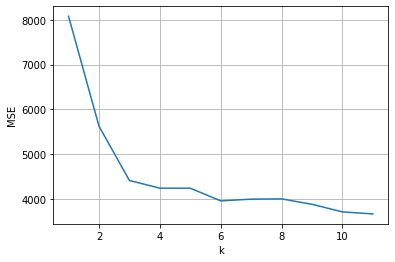

In [11]:
# Replace "..." with your code

from matplotlib import pyplot as plt

mse = []
for k in range(1, 12):
    regressor = KNeighborsRegressor(n_neighbors=k)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    mse.append(MSE(y_pred,y_test))

plt.plot(np.arange(1,12), mse)
plt.xlabel('k')
plt.ylabel('MSE')
plt.grid()

(1g) I observe that the MSE is inversely proportional to K, because as the number of neighbors (k) increases, the MSE decreases significantly. This happens because with more neighbors, the algorithm has more reference points with which to make an accurate prediction. The reason the MSE changes is because there are more points being used to predict the response variable as k changes, so the predictions become more informed. If k was to become too large, the MSE may increase again depending on the data presented.

## Problem 2 - Linear Independence



#### (a)   Verify that $c_1 = [0, 0, 1]$, $c_2 = [0, 1, 0]$, $c_3 = [1, 1, 0]$ are linearly independent vectors. 






#### (b)   Recall the definition of basis vectors. Verify that any 3-dimensional vector $b$ can be written as a linear combination of the basis vectors:

$\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:a_1=\begin{bmatrix}
-1\\
0\\
3
\end{bmatrix}$, $a_2=\begin{bmatrix}
1\\
2\\
-3
\end{bmatrix}$, $a_3=\begin{bmatrix}
4\\
-2\\
3
\end{bmatrix}$

**Note**: An explanation (~100 words) for each part should be enough.

#### Answer:

(a) In order to prove linear independence, the vectors should only add up to 0 when their coefficients are 0 as well. By putting them in a matrix and solving for the homogeneous solution, we can see that the vectors are linearly independent as the coefficients: x, y, and z must be 0 to satisfy the matrix
:

$\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\begin{bmatrix}
0 & 0 & 1 & 0\\
0 & 1 & 1 & 0\\
1 & 0 & 0 & 0
\end{bmatrix}
=\begin{bmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 1 & 0\\
0 & 0 & 1 & 0
\end{bmatrix}
=\begin{bmatrix}
[1] & 0 & 0 & 0\\
0 & [1] & 0 & 0\\
0 & 0 & [1] & 0
\end{bmatrix}$

There is a unique pivot in every row, which means the only linear combination that works is $0c_1+0c_2+0c_3=0$, so the vectors are linearly independent


(b) Vector b can be represented as a linear combination of $a_1,a_2,$ and $a_3$ if the vectors are all linearly independent and span R3. The equation: $x*a_1+y*a_2+z*a_3$ must produce any vector in R3. This is represented by the matrix:
$\begin{bmatrix}
-1 & 1 & 4 \\
0 & 2 & -2 \\
3 & -3 & 3 
\end{bmatrix}$ which $=\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 
\end{bmatrix}$ by row reduction

and this parametric form holds with arbitrary coefficients x,y,z:

$x\begin{bmatrix}
1\\
0\\
0
\end{bmatrix}+y\begin{bmatrix}
0\\
1\\
0
\end{bmatrix}+z\begin{bmatrix}
0\\
0\\
1
\end{bmatrix}=\begin{bmatrix}
b_1\\
b_2\\
b_3
\end{bmatrix}$

$b_1,b_2,b_3$ are thus represented by a linear combination of the unit vectors for R3 and that means any vector "b" is included in the span of the reduced basis vectors, $a_1,a_2$, and $a_3$ and it can be any vector in R3